In [1]:
import os
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

from datetime import timedelta
from multiprocessing import cpu_count
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

############################## Write your code ##############################
##### Optional
# Import more if you may
# Note: If there is an import error when grading, you will get F
# Hint: Stick to the often used packages
#############################################################################

In [2]:
SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True

GPU = 0

device = torch.device(f'cuda:{GPU}' if torch.cuda.is_available() else 'cpu')

def fake_z(batch_size, noise, device):
    return torch.randn(batch_size, noise, 1, 1, device=device)

In [3]:
transform = transforms.Compose([
############################## Write your code ##############################
# Transform your data
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5) # -1 ~ 1
#############################################################################
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

In [4]:
############################## Write your code ##############################
##### Optional
# Change BATCH_SIZE if you may
BATCH_SIZE = 2 ** 8

# Change NUM_WORKERS if you may
NUM_WORKERS = 0
#############################################################################
    
trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [5]:
############################## Write your code ##############################
# Build Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.net = nn.Sequential(
            # 1x1 -> 4x4
            nn.ConvTranspose2d(100, 128, kernel_size=4, bias=False), 
            nn.BatchNorm2d(128),  #batch normalization
            nn.ReLU(inplace=False),
            # 4x4 -> 6x6
            nn.ConvTranspose2d(128, 64, kernel_size=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=False),
            # 6x6 -> 14x14
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=False),
            # 14x14 -> 28x28 (don't use fully connected layer)
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh() # output value 범위지정
        )

    def forward(self, x):
        output = x
        return self.net(output)
#############################################################################

In [6]:
############################## Write your code ##############################
# Build Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            # 28x28 -> 14x14
            nn.Conv2d(1, 32, 4, 2, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=False),
            nn.Dropout2d(0.3), #set dropout rate
            # 14x14 -> 6x6
            nn.Conv2d(32, 64, 4, 2, 0, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=False),
            nn.Dropout2d(0.3),
            # 6x6 -> 3x3
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=False),
            # 3x3 -> 1x1 (not use fc)
            nn.Conv2d(128, 1, 4, 2, 1, bias=False),
            nn.Sigmoid(), # classification
        )

    def forward(self, x):
        output = x.view(-1, 1, 28, 28)
        output = self.net(output)
        return output.squeeze()
#############################################################################

In [7]:
############################## Write your code ##############################
# Set your model(s), optimizer(s), and loss function(s)
criterion = nn.BCELoss()
noise = 100

discriminator = Discriminator().to(device)
generator = Generator().to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
dis_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

#############################################################################

Epoch [5/200] Elapsed time: 0:01:00.279320
Epoch [10/200] Elapsed time: 0:02:02.401838
Epoch [15/200] Elapsed time: 0:03:06.536362
Epoch [20/200] Elapsed time: 0:04:07.620307


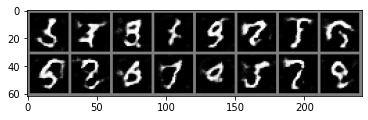

Epoch [25/200] Elapsed time: 0:05:07.333383
Epoch [30/200] Elapsed time: 0:06:07.486770
Epoch [35/200] Elapsed time: 0:07:05.694396
Epoch [40/200] Elapsed time: 0:08:05.582737


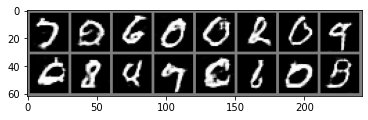

Epoch [45/200] Elapsed time: 0:09:03.983962
Epoch [50/200] Elapsed time: 0:10:03.674489
Epoch [55/200] Elapsed time: 0:11:01.154241
Epoch [60/200] Elapsed time: 0:11:58.772456


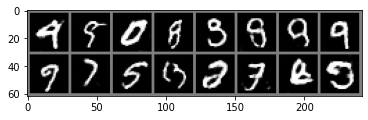

Epoch [65/200] Elapsed time: 0:12:57.523368
Epoch [70/200] Elapsed time: 0:13:55.077870
Epoch [75/200] Elapsed time: 0:14:53.192192
Epoch [80/200] Elapsed time: 0:15:52.373735


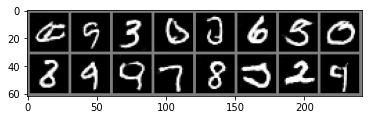

Epoch [85/200] Elapsed time: 0:16:51.305273
Epoch [90/200] Elapsed time: 0:17:54.233114
Epoch [95/200] Elapsed time: 0:19:00.664592
Epoch [100/200] Elapsed time: 0:20:08.229589


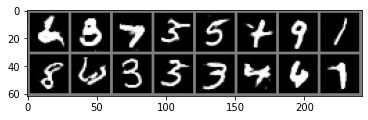

Epoch [105/200] Elapsed time: 0:21:09.822177
Epoch [110/200] Elapsed time: 0:22:07.889650
Epoch [115/200] Elapsed time: 0:23:05.178276
Epoch [120/200] Elapsed time: 0:24:04.722667


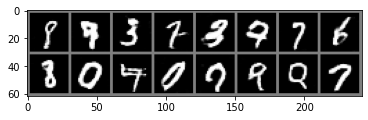

Epoch [125/200] Elapsed time: 0:25:05.474458
Epoch [130/200] Elapsed time: 0:26:11.942177
Epoch [135/200] Elapsed time: 0:27:11.619590
Epoch [140/200] Elapsed time: 0:28:13.867066


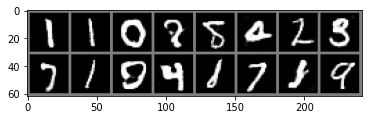

Epoch [145/200] Elapsed time: 0:29:12.955914
Epoch [150/200] Elapsed time: 0:30:13.145348
Epoch [155/200] Elapsed time: 0:31:12.573529
Epoch [160/200] Elapsed time: 0:32:11.184691


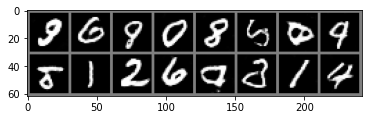

Epoch [165/200] Elapsed time: 0:33:10.629133
Epoch [170/200] Elapsed time: 0:34:09.451624
Epoch [175/200] Elapsed time: 0:35:08.987847
Epoch [180/200] Elapsed time: 0:36:08.787744


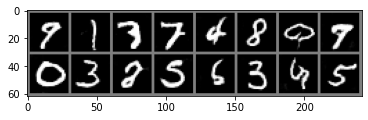

Epoch [185/200] Elapsed time: 0:37:09.843050
Epoch [190/200] Elapsed time: 0:38:10.505516
Epoch [195/200] Elapsed time: 0:39:10.333166
Epoch [200/200] Elapsed time: 0:40:13.619033


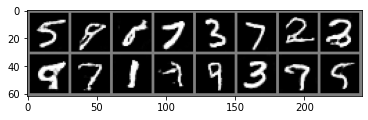

In [8]:
############################## Write your code ##############################
##### Optional
# Change the training process below so it would fit your model
# Note: You must print 16 generated images every 20 epochs to show progress
EPOCHS = 200

start = time.time()

for ep in range(EPOCHS):

    generator.train()
    discriminator.train()

    for image, _ in trainloader:
        batch_size = image.size(0)

        image = image.to(device)
 
        real_label = torch.full((batch_size,), 1.0, device=device)
        fake_label = torch.full((batch_size,), 0.0, device=device)

        dis_optimizer.zero_grad()

        real_output = discriminator(image)
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))

        real_loss = criterion(real_output, real_label)
        fake_loss = criterion(fake_output, fake_label)
        dis_loss = real_loss + fake_loss
  
        dis_loss.backward()
        dis_optimizer.step()

        gen_optimizer.zero_grad()
  
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))
  
        gen_loss = criterion(fake_output, real_label)
  
        gen_loss.backward()
        gen_optimizer.step()

        
    # Print time spent every 5 epochs
    if (ep + 1) % 5 == 0:
        print('Epoch [{}/{}] Elapsed time: {}'.format(ep + 1, EPOCHS, timedelta(seconds=time.time() - start)))

    # Generate 16 images every 20 epochs
    if (ep + 1) % 20 == 0:
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            image = make_grid(generator(fake_z(16, noise, device)).view(-1, 1, 28, 28).detach().cpu())
            image = (image + 1) / 2
            image = image.numpy()
            image = np.transpose(image, (1, 2, 0))
            plt.imshow(image)
            plt.show()
#############################################################################